**This notebook will be the first time putting together a model in order to get an understanding of the challenges that will be faced moving forward and to get familiar with typical runtimes.**<br>
The sample set has 250 samples and the DataFrame is set up as follows:<br>
- An image number.
- Dummied classes.
- A categorical classifier, with the target labeled from 0-6.  There are 7 classes, which will be identified below.
- A binary classifier, where 0 == benign and 1 == malignant.

Images will be loaded to the DataFrame and a simple convolutional neural network will be built.




In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the sample set
sample250 = pd.read_csv('./sample.csv', index_col = 'Unnamed: 0')

In [3]:
sample250.head()

,image,NV,BKL,VASC,DF,MEL,BCC,AKIEC,Category,Malignant
0,ISIC_0024306,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,ISIC_0024307,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,ISIC_0024308,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,ISIC_0024309,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,ISIC_0024310,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,1


-------------

### Loading an example image

In [4]:
#The images are labeled sequentially from 0024306.  For the sample DataFrame, the first 250 images will be used.
temp = ndimage.imread('./data/ISIC2018_Task3_Training_Input/ISIC_0024306.jpg')

In [5]:
temp.shape

(450, 600, 3)

In [6]:
#Each image is 450 * 600 * 3 layers(R,G,B)
#Note that files were randomly selected from finder to ensure that each image was the same shape.
temp.shape

(450, 600, 3)

In [7]:
#Scaling image by dividing colors by 255
temp=temp/255

In [8]:
type(temp)

numpy.ndarray

Going to print an example of each type of lesion

Text(0.5, 1.0, 'Example of a Benign Nevus')

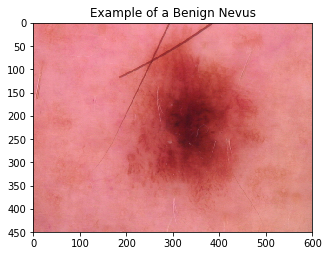

In [9]:
'''First Image in the Data Set, A Benign Nevus'''
fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(temp)
plt.title('Example of a Benign Nevus')

In [10]:
#used this cell to choose image indexes to show

#sample250[sample250.Category == 0]

Text(0.5, 1.0, 'Example of a Benign Keratoses')

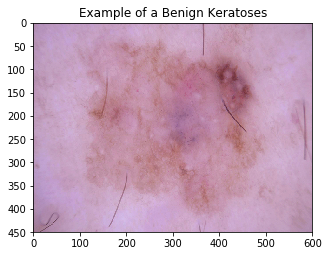

In [11]:
temp = ndimage.imread('./data/ISIC2018_Task3_Training_Input/ISIC_0024312.jpg')
fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(temp)
plt.title('Example of a Benign Keratoses')

Text(0.5, 1.0, 'Example of a Benign Vascular Lesion')

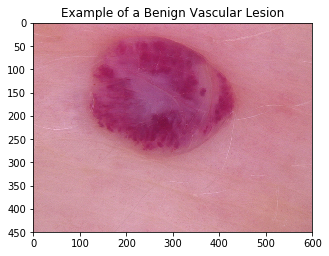

In [12]:
temp = ndimage.imread('./data/ISIC2018_Task3_Training_Input/ISIC_0024370.jpg')
fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(temp)
plt.title('Example of a Benign Vascular Lesion')

Text(0.5, 1.0, 'Example of a Benign Dermatofibroma')

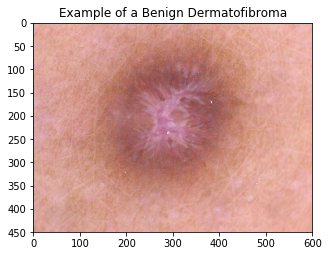

In [13]:
temp = ndimage.imread('./data/ISIC2018_Task3_Training_Input/ISIC_0024318.jpg')
fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(temp)
plt.title('Example of a Benign Dermatofibroma')

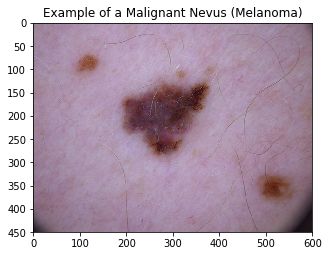

In [14]:
temp = ndimage.imread('./data/ISIC2018_Task3_Training_Input/ISIC_0024315.jpg')
fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(temp)
plt.title('Example of a Malignant Nevus (Melanoma)');

Text(0.5, 1.0, 'Example of a Basal Cell Carcinoma')

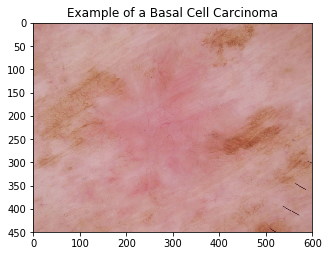

In [15]:
temp = ndimage.imread('./data/ISIC2018_Task3_Training_Input/ISIC_0024345.jpg')
fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(temp)
plt.title('Example of a Basal Cell Carcinoma')

Text(0.5, 1.0, 'Example of an Actinic Keratoses')

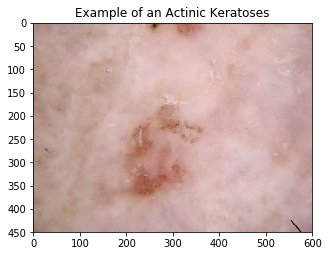

In [16]:
temp = ndimage.imread('./data/ISIC2018_Task3_Training_Input/ISIC_0024329.jpg')
fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(temp)
plt.title('Example of an Actinic Keratoses')

### Loading images into a list to be used in conjunction with the sample250 DataFrame

In [17]:
#There were difficulties in loading this image in the correct 4D shape.
#My wonderful local instructor's creative advice was to create the correct shape with zeros 
#and later overwrite with the images! 

images=np.zeros((250,450,600,3))

In [18]:
images.shape

(250, 450, 600, 3)

In [19]:
images.shape[0]

250

In [20]:
for i in range(0,images.shape[0]):
    n=24306+i
    images[i,:,:,:]=ndimage.imread(f'./data/ISIC2018_Task3_Training_Input/ISIC_00{n}.jpg')

In [21]:
#This is to scale, and turn each color into a value between 0 and 1
images=images/255

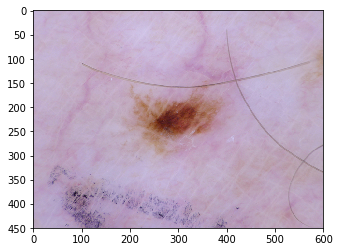

In [22]:
plt.imshow(images[8])

In [23]:
sample250.head()

,image,NV,BKL,VASC,DF,MEL,BCC,AKIEC,Category,Malignant
0,ISIC_0024306,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,ISIC_0024307,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,ISIC_0024308,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,ISIC_0024309,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,ISIC_0024310,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,1


In [24]:
images[1].shape

(450, 600, 3)

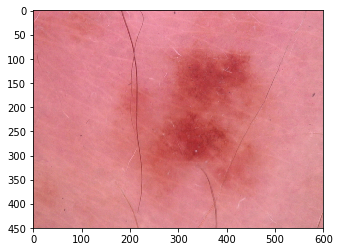

In [25]:
'''The second image in sample set'''
plt.imshow(images[1])

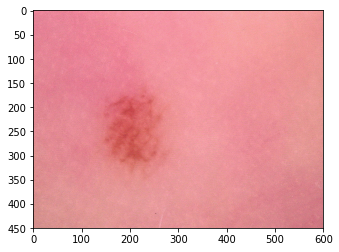

In [26]:
'''The last image in sample set'''
plt.imshow(images[249])

### Balancing Classes

In [27]:
sample250.Category.value_counts()

0    161
1     29
4     21
5     19
6     11
3      5
2      4
Name: Category, dtype: int64

In [28]:
categories = [sample250[sample250.Category == i].sample(n = 25, replace=True) for i in sample250.Category.value_counts().index]

balanced_sample = pd.concat(categories, axis = 0)

balanced_sample.shape

(175, 10)

### Getting a first model up

In [29]:
#keras imports

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [22]:
#Define X and y, train_test_split as normal.
#Going to set up a categorical model first, then a binary benign/malignant test.
X = images
y = sample.Category

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [85]:
#No need to reshape this data, it's already preprocessed as a (187*450*600*3)

#Need to change the categories to categorical for keras to make sense of them.
y_train = np_utils.to_categorical(y_train, 7)
y_test = np_utils.to_categorical(y_test, 7)

### Set up a basic model [1]

In [101]:
model = Sequential()


#First Layer
model.add(Conv2D(filters = 3,              # number of filters
                kernel_size = 10,          # height/width of filter, a 10 pixel * 10 pixel square(can tweak later)
                activation='relu',         # activation function 
                input_shape=(450,600,3),   # shape of input images
                padding = 'same'))         # of all of the images I've randomly looked at, there is room for padding.
model.add(MaxPooling2D(pool_size=(5,5)))   #filter = 5, stride = 5

#Second Layer
model.add(Conv2D(filters = 3, kernel_size = 10, activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

#Dropout layer
model.add(Dropout(0.25))

#Flatten
model.add(Flatten())

#Fully connected layer          
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

In [102]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [106]:
model.fit(X_train, y_train, 
          batch_size=32, epochs=2, verbose=1)

Epoch 1/2
187/187 [==============================] - 130s 697ms/step - loss: 0.9500 - acc: 0.6578
Epoch 2/2
187/187 [==============================] - 124s 664ms/step - loss: 0.9229 - acc: 0.6524


In [ ]:
#Stopped cell from running because saw no improvement in epochs after the first 2. 
#accuracy was 0.6524 between epochs 2 and 8.

In [107]:
score = model.evaluate(X_test, y_test, verbose=0)
labels = model.metrics_names

In [108]:
print(str(labels[0]) + ": " + str(score[0]))
print(str(labels[1]) + ": " + str(score[1]))

loss: 1.1273468959899176
acc: 0.619047622832041


--------

#### Summary

In this notebook, A sample DataFrame along with matching images was created which holds 2.5% of the total set.  Images were reshaped so they will fit in the model and an initial model was created.  This model got an accuracy score of .6524 on the train set and .619 on test.

#### Footnotes

[1] Matt Brems, General Assembly, Lecture on 10/4/18, Convolutional Neural Networks with the MNIST dataset.